
# Exploratory Data Analysis (EDA)  of   PEA25- Estimated Population  by  Citizenship (Persons in April)


Notebook provides an exploratory data analysis (EDA) of the PEA24  The complete series of datasets can be found at
[Central Statistics Office in Ireland  population of Ireland,](https://data.cso.ie/product/pme)

| Code   | Description               | Status |
| ------ | ------------------------- | ------ |
| PEA01  | Population Estimates      | EDAed       |
| PEA03  | Flow                      |        |
| PEA04  | Region                    |        |
| PEA11  | Single                    |        |
| PEA15  | Component                 | EDAed       |
| PEA18  | Origin/Destination        |        |
| PEA23  | Citizenship Emigration    |   EDAed      |
| PEA24  | Citizenship Immigration   |   EDAed      |
| PEA25  | Citizenship Population    |    EDAed     |

Click on the image to explore reconfigure the data at source.

<a href="https://data.cso.ie/table/PEA25">
    <img src="../screens/pea25.png" alt="Example Image" width="500"/>
</a>





## Loading  Libraries and Functions



In [1]:
import pandas as pd
import altair as alt
# Enable the VegaFusion data transformer
alt.data_transformers.enable('vegafusion')
import matplotlib.pyplot as plt
# Adjusting default font sizes for all plots
plt.rcParams['axes.titlesize'] = 16   # For title
plt.rcParams['axes.labelsize'] = 16   # For x and y labels
plt.rcParams['xtick.labelsize'] = 12  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # For y-axis tick labels
import seaborn as sns
import os
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

%matplotlib inline


## Loading  PEA25 Population by Citizenship raw

In [2]:
# Load the dataset
file_path = '../raw/PEA25.csv'
df = pd.read_csv(file_path)

In [3]:
# Preview top 5 rows
df.head() # Note examples of missing population change data in top few rows

,Statistic Label,Year,Sex,Citizenship,UNIT,VALUE
0,Estimated Population,2006,Both sexes,All Countries,Thousand,4232.9
1,Estimated Population,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,43.8
2,Estimated Population,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,132.5
3,Estimated Population,2006,Both sexes,United Kingdom,Thousand,115.5
4,Estimated Population,2006,Both sexes,Ireland,Thousand,3802.4


In [4]:
#  Unique Values
df.nunique()

Statistic Label      1
Year                18
Sex                  3
Citizenship          6
UNIT                 1
VALUE              306
dtype: int64

In [5]:
# Unique values in non-numeric columns
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'Statistic Label': array(['Estimated Population'], dtype=object),
 'Sex': array(['Both sexes', 'Male', 'Female'], dtype=object),
 'Citizenship': array(['All Countries',
        'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)',
        'EU15 to EU27 (accession countries joined post 2004)',
        'United Kingdom', 'Ireland',
        'All countries excluding Ireland,United Kingdom and EU272020'],
       dtype=object),
 'UNIT': array(['Thousand'], dtype=object)}

 ## Duplication check PEA25 Population by Citizenship
 There are no duplicated rows in dataframe df_long.

In [6]:
# duplicates = df.duplicated()
# any_duplicates = duplicates.any()
# # Print result based on the condition
# if any_duplicates:
#     print("There are duplicated rows in dataframe df_long.")
# else:
#     print("There are no duplicated rows in dataframe df_long.")

There are no duplicated rows in dataframe df_long.


In [7]:
df.columns

Index(['Statistic Label', 'Year', 'Sex', 'Citizenship', 'UNIT', 'VALUE'], dtype='object')

## Long Dataframe PEA24 Immigration by Citizenship housekeeping 

In [8]:
# Check if the columns 'STATISTIC Label' and 'UNIT' exist in the DataFrame
columns_to_drop = [col for col in ['Statistic Label', 'UNIT'] if col in df.columns]

# Drop the columns if they exist
if columns_to_drop:
    df = df.drop(columns_to_drop, axis=1)


# Renaming the remaining columns according to pythonic conventions
df = df.rename(columns={
    'Year': 'year',
    'Sex': 'sex',
    'Citizenship':'citizenship',
    'Origin or Destination': 'endpoint',
    'VALUE': 'value'
})
#preview changes
df


,year,sex,citizenship,value
0,2006,Both sexes,All Countries,4232.9
1,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,43.8
2,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,132.5
3,2006,Both sexes,United Kingdom,115.5
4,2006,Both sexes,Ireland,3802.4
...,...,...,...,...
319,2023,Female,EU14 excl Irl (countries in the EU pre 2004 ex...,50.0
320,2023,Female,EU15 to EU27 (accession countries joined post ...,122.6
321,2023,Female,United Kingdom,40.5
322,2023,Female,Ireland,2287.5


In [9]:
# Unique values in non-numeric columns
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'sex': array(['Both sexes', 'Male', 'Female'], dtype=object),
 'citizenship': array(['All Countries',
        'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)',
        'EU15 to EU27 (accession countries joined post 2004)',
        'United Kingdom', 'Ireland',
        'All countries excluding Ireland,United Kingdom and EU272020'],
       dtype=object)}

In [10]:

# Save the clean DataFrame to a new CSV file
df.to_csv('../data/long_PEA25_Population_by_Citizenship.csv', index=True)

In [11]:
df.columns

Index(['year', 'sex', 'citizenship', 'value'], dtype='object')

In [12]:
# Pivoting the data with 'country' as columns and 'year', 'sex', 'endpoint' as index
df_pivot = df.pivot_table(index=['year', 'sex'], columns='citizenship', values='value', aggfunc='first')
#Reset index
df_pivot.reset_index(inplace=True)
# Save the clean DataFrame to a new CSV file
df_pivot.to_csv('../data/country-pivot.csv', index=True)
# Resetting the index to use 'year' in the plot
df_pivot = df_pivot.reset_index()
# Displaying the first few rows of the pivoted data
df_pivot.columns

Index(['index', 'year', 'sex', 'All Countries',
       'All countries excluding Ireland,United Kingdom and EU272020',
       'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)',
       'EU15 to EU27 (accession countries joined post 2004)', 'Ireland',
       'United Kingdom'],
      dtype='object', name='citizenship')

In [13]:
df_pivot.columns

Index(['index', 'year', 'sex', 'All Countries',
       'All countries excluding Ireland,United Kingdom and EU272020',
       'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)',
       'EU15 to EU27 (accession countries joined post 2004)', 'Ireland',
       'United Kingdom'],
      dtype='object', name='citizenship')

In [14]:
df_pivot.head()

citizenship,index,year,sex,All Countries,"All countries excluding Ireland,United Kingdom and EU272020",EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland),EU15 to EU27 (accession countries joined post 2004),Ireland,United Kingdom
0,0,2006,Both sexes,4232.9,138.8,43.8,132.5,3802.4,115.5
1,1,2006,Female,2115.6,67.9,22.5,52.6,1914.9,57.7
2,2,2006,Male,2117.3,70.9,21.3,79.9,1887.4,57.8
3,3,2007,Both sexes,4375.8,149.6,47.0,207.6,3856.2,115.5
4,4,2007,Female,2184.6,73.7,25.2,87.4,1940.5,57.9


In [15]:
# Dictionary for renaming columns
rename_dict = {
    'All countries excluding Ireland,United Kingdom and EU272020': 'Non-EU/Ireland/UK 2020',
    'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)': 'EU14 excl Irl',
    'EU15 to EU27 (accession countries joined post 2004)': 'EU15 to EU27',
    'Ireland': 'Ireland',
    'United Kingdom': 'United Kingdom'
}
df_pivot.rename(columns=rename_dict, inplace=True)
df_pivot.head()



citizenship,index,year,sex,All Countries,Non-EU/Ireland/UK 2020,EU14 excl Irl,EU15 to EU27,Ireland,United Kingdom
0,0,2006,Both sexes,4232.9,138.8,43.8,132.5,3802.4,115.5
1,1,2006,Female,2115.6,67.9,22.5,52.6,1914.9,57.7
2,2,2006,Male,2117.3,70.9,21.3,79.9,1887.4,57.8
3,3,2007,Both sexes,4375.8,149.6,47.0,207.6,3856.2,115.5
4,4,2007,Female,2184.6,73.7,25.2,87.4,1940.5,57.9


 ## Cleaning PEA24 Immigration by Citizenship 

In [16]:
# NaNs mask summed per column.
df_pivot.isna().sum()

citizenship
index                     0
year                      0
sex                       0
All Countries             0
Non-EU/Ireland/UK 2020    0
EU14 excl Irl             0
EU15 to EU27              0
Ireland                   0
United Kingdom            0
dtype: int64

In [17]:
# Save the clean DataFrame to a new CSV file
df_pivot.to_csv('../data/pivot_citizenship_population_clean_pea25.csv', index=True)

## Initial EDA on PEA24 Immigration by Citizenship

In [18]:
df_pivot.head()

citizenship,index,year,sex,All Countries,Non-EU/Ireland/UK 2020,EU14 excl Irl,EU15 to EU27,Ireland,United Kingdom
0,0,2006,Both sexes,4232.9,138.8,43.8,132.5,3802.4,115.5
1,1,2006,Female,2115.6,67.9,22.5,52.6,1914.9,57.7
2,2,2006,Male,2117.3,70.9,21.3,79.9,1887.4,57.8
3,3,2007,Both sexes,4375.8,149.6,47.0,207.6,3856.2,115.5
4,4,2007,Female,2184.6,73.7,25.2,87.4,1940.5,57.9


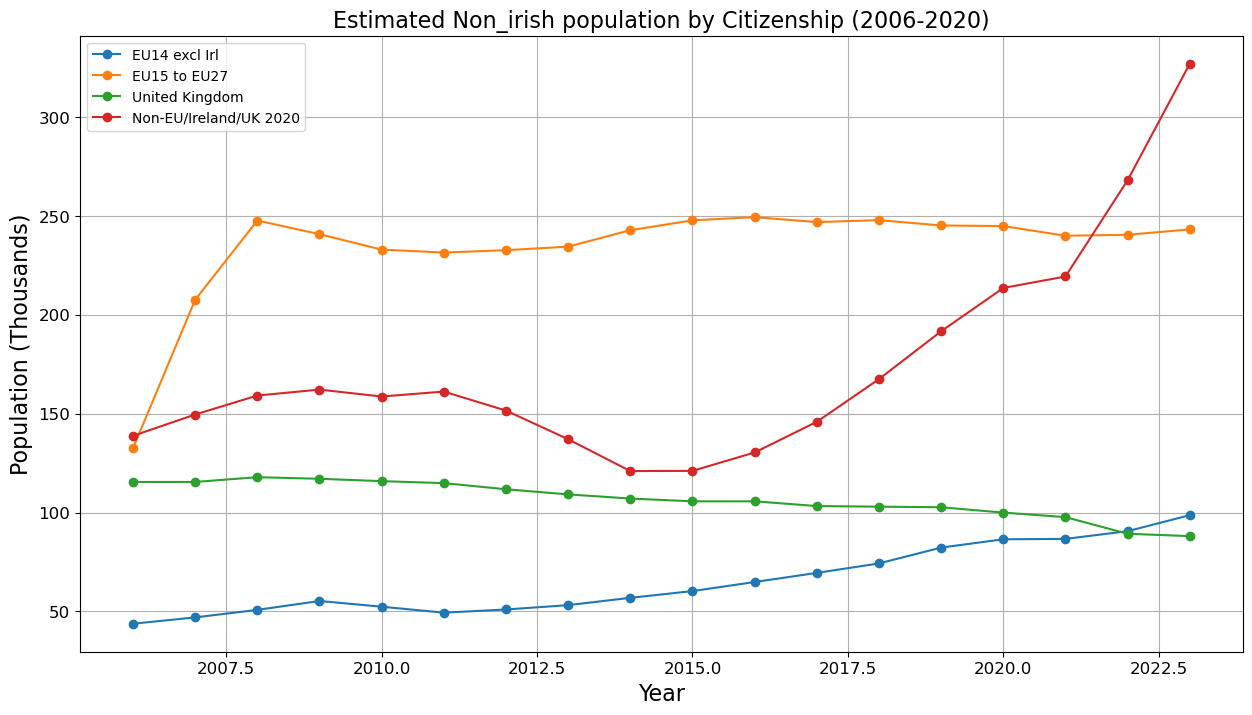

In [23]:
# Filtering the DataFrame for 'Both sexes' to focus on aggregate data
df_filtered = df_pivot[df_pivot['sex'] == 'Both sexes' ]

# Plotting the data for the specified columns
plt.figure(figsize=(15, 8))
plt.plot(df_filtered['year'], df_filtered['EU14 excl Irl'], marker='o', label='EU14 excl Irl')
plt.plot(df_filtered['year'], df_filtered['EU15 to EU27'], marker='o', label='EU15 to EU27')
plt.plot(df_filtered['year'], df_filtered['United Kingdom'], marker='o', label='United Kingdom')
plt.plot(df_filtered['year'], df_filtered['Non-EU/Ireland/UK 2020'], marker='o', label='Non-EU/Ireland/UK 2020')

plt.title('Estimated Non_irish population by Citizenship (2006-2020)')
plt.xlabel('Year')
plt.ylabel('Population (Thousands)')
plt.legend()
plt.grid(True)
plt.savefig('../images/Citizenship_Population.png')
plt.show()

### Ongoing research
These mortality, fertility, and migration figures will be merged with population and other data from  [Central Statistics Office in Ireland  population of Ireland series.](https://data.cso.ie/product/pme)

In [24]:
df=df_pivot

In [25]:


# Display basic descriptive statistics
df.describe()



citizenship,index,year,All Countries,Non-EU/Ireland/UK 2020,EU14 excl Irl,EU15 to EU27,Ireland,United Kingdom
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,26.500000,2014.500000,3157.872222,115.712963,43.462963,155.883333,2771.675926,71.127778
std,15.732133,5.236843,1144.143957,55.666077,19.603930,58.918039,1000.917854,26.191100
min,0.000000,2006.000000,2115.600000,59.800000,21.300000,52.600000,1887.400000,40.500000
25%,13.250000,2010.000000,2300.350000,75.000000,27.450000,118.925000,2028.500000,53.150000
50%,26.500000,2014.500000,2478.600000,95.900000,40.450000,123.300000,2169.000000,57.700000
75%,39.750000,2019.000000,4549.450000,148.675000,50.950000,232.925000,3985.525000,102.025000
max,53.000000,2023.000000,5281.600000,327.000000,98.700000,249.400000,4524.600000,117.900000


In [26]:
# Selecting only the numerical columns related to different regions/countries
columns_of_interest = ['Non-EU/Ireland/UK 2020', 'EU14 excl Irl', 'EU15 to EU27', 'Ireland', 'United Kingdom']
df_regions = df[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = df_regions.corr()

correlation_matrix


citizenship,Non-EU/Ireland/UK 2020,EU14 excl Irl,EU15 to EU27,Ireland,United Kingdom
citizenship,,,,,
Non-EU/Ireland/UK 2020,1.000000,0.920772,0.740692,0.807277,0.594433
EU14 excl Irl,0.920772,1.000000,0.831659,0.872481,0.628267
EU15 to EU27,0.740692,0.831659,1.000000,0.959083,0.886704
Ireland,0.807277,0.872481,0.959083,1.000000,0.922101
United Kingdom,0.594433,0.628267,0.886704,0.922101,1.000000
